# OpenCV Template

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Config</a></span><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Path" data-toc-modified-id="Path-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Path</a></span></li></ul></li><li><span><a href="#imread" data-toc-modified-id="imread-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>imread</a></span></li><li><span><a href="#Resize" data-toc-modified-id="Resize-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Resize</a></span><ul class="toc-item"><li><span><a href="#Height,Widthの比率を変えずに指定した枠内に収めるようにリサイズ" data-toc-modified-id="Height,Widthの比率を変えずに指定した枠内に収めるようにリサイズ-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Height,Widthの比率を変えずに指定した枠内に収めるようにリサイズ</a></span></li></ul></li><li><span><a href="#Bounding-Box" data-toc-modified-id="Bounding-Box-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bounding Box</a></span><ul class="toc-item"><li><span><a href="#平滑化-(blur)" data-toc-modified-id="平滑化-(blur)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>平滑化 (blur)</a></span></li><li><span><a href="#Canny法" data-toc-modified-id="Canny法-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Canny法</a></span></li><li><span><a href="#findContours" data-toc-modified-id="findContours-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>findContours</a></span></li></ul></li><li><span><a href="#2値化" data-toc-modified-id="2値化-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>2値化</a></span></li><li><span><a href="#END" data-toc-modified-id="END-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>END</a></span></li></ul></div>

## Config

### Import

In [1]:
import os
import pathlib
import random
random.seed(12345)
import copy

import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print("cv2.__version__ : {}".format(cv2.__version__))

cv2.__version__ : 4.0.0


### Path

In [3]:
HOME_Path = pathlib.Path(os.getcwd()).parents[0]
img_Path = HOME_Path / "img"
print("path name | exist | path\n" + 
      "========================")
print("HOME_Path | {:5} | {}".format(HOME_Path.exists(), str(HOME_Path)))
print("img_Path  | {:5} | {}".format(img_Path.exists(),  str(img_Path)))

path name | exist | path
HOME_Path |     1 | /Users/hiroaki.sugisaki/workdir/git/Learning_OpenCV_Python
img_Path  |     1 | /Users/hiroaki.sugisaki/workdir/git/Learning_OpenCV_Python/img


## imread

im.shape : (576, 768, 3)
-------------------------------
| Height  | Width   | Channel |
|     576 |     768 |       3 |
-------------------------------


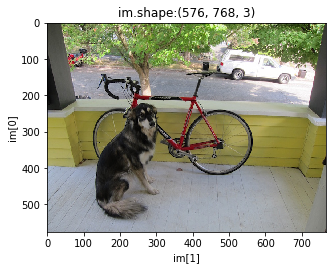

In [4]:
_filepath = str(img_Path / "dog.jpg")
im = cv2.imread(filename=_filepath)
assert im is not None, "Could not open or find the image : {}".format(_filepath)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  # opencv -> matplot (bgr -> rgb)
_h, _w, _c = im.shape
print("im.shape : {}".format(im.shape))
print("-------------------------------\n" +
      "| Height  | Width   | Channel |\n" +
      "| {:7} | {:7} | {:7} |\n".format(_h, _w, _c) +
      "-------------------------------")

########################################
fig = plt.figure(figsize=(5,5))
nrows, ncols, idx = 1, 1, 0
idx += 1
ax = fig.add_subplot(nrows, ncols, idx)
ax.imshow(im)
ax.set_title(label="im.shape:{}".format(im.shape))
ax.set_xlabel(xlabel="im[1]")
ax.set_ylabel(ylabel="im[0]")
####################
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

## Resize

### Height,Widthの比率を変えずに指定した枠内に収めるようにリサイズ

- https://github.com/ayooshkathuria/pytorch-yolo-v3/blob/master/preprocess.py#L15-L27
- https://github.com/ayooshkathuria/pytorch-yolo-v3/blob/fbb4ef98d5a598f4c8eded6d618a599b7d289e2f/preprocess.py#L15-L27

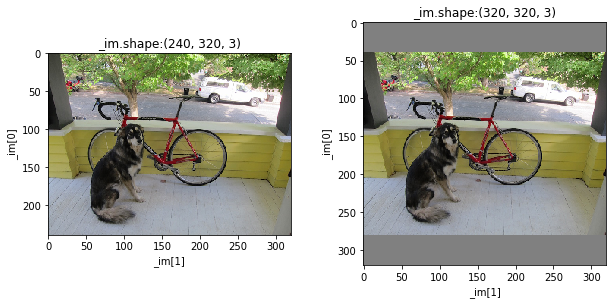

In [5]:
################################################################################
########################################
# Height,Widthの比率を変えずに指定した枠内に収めるようにリサイズ
_filepath = str(img_Path / "dog.jpg")
im = cv2.imread(filename=_filepath)
im = cv2.cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

im_h, im_w = im.shape[0], im.shape[1]
w, h = (320, 320)

new_w = int(im_w * min(w/im_w, h/im_h))
new_h = int(im_h * min(w/im_w, h/im_h))

resized_image = cv2.resize(im, (new_w,new_h), interpolation = cv2.INTER_CUBIC)

########################################
# 枠内の空いたスペースをRGB=(128,128,128)で埋める
canvas = np.full((w, h, 3), 128)
canvas[(h-new_h)//2:(h-new_h)//2 + new_h,(w-new_w)//2:(w-new_w)//2 + new_w,  :] = resized_image

################################################################################
# Plot
fig = plt.figure(figsize=(10,5))
nrows, ncols, idx = 1, 2, 0
####################
idx += 1
_im = resized_image
ax = fig.add_subplot(nrows, ncols, idx)
ax.imshow(_im)
ax.set_title(label="_im.shape:{}".format(_im.shape))
ax.set_xlabel(xlabel="_im[1]")
ax.set_ylabel(ylabel="_im[0]")
####################
idx += 1
_im = canvas
ax = fig.add_subplot(nrows, ncols, idx)
ax.imshow(_im)
ax.set_title(label="_im.shape:{}".format(_im.shape))
ax.set_xlabel(xlabel="_im[1]")
ax.set_ylabel(ylabel="_im[0]")
####################
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

## Bounding Box

- [OpenCV: Creating Bounding boxes and circles for contours](https://docs.opencv.org/3.4/da/d0c/tutorial_bounding_rects_circles.html)

In [6]:
# read image file
_filepath = str(img_Path / "dog.jpg")
im = cv2.imread(filename=_filepath)
assert im is not None, "Could not open or find the image : {}".format(_filepath)

### 平滑化 (blur)

ノイズを除去している.

ここの関数を「バイラテラルフィルタ」を使ってみたい

- https://imagingsolution.net/imaging/bilateralfilter/

In [7]:
# Convert image to gray and blur it
im_gray = cv2.cvtColor(src=im, code=cv2.COLOR_BGR2GRAY)
im_gray_blur = cv2.blur(src=im_gray, ksize=(3,3))

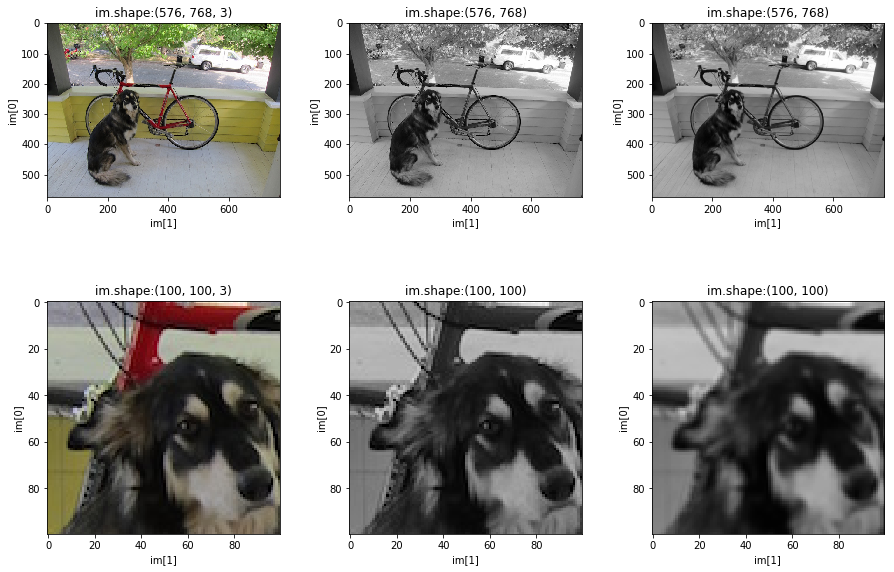

In [8]:
# plot
plot_array_list = [
    cv2.cvtColor(im, cv2.COLOR_BGR2RGB),  # opencv(bgr) -> matplot(rgb)
    im_gray,
    im_gray_blur,
    cv2.cvtColor(im, cv2.COLOR_BGR2RGB)[200:300, 200:300, :],
    im_gray[200:300, 200:300],
    im_gray_blur[200:300, 200:300],
]
########################################
fig = plt.figure(figsize=(15,10))
nrows, ncols, idx = 2, 3, 0
for _im in plot_array_list:
    idx += 1
    ax = fig.add_subplot(nrows, ncols, idx)
    ax.imshow(_im, cmap="gray")
    ax.set_title(label="im.shape:{}".format(_im.shape))
    ax.set_xlabel(xlabel="im[1]")
    ax.set_ylabel(ylabel="im[0]")
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

### Canny法

- [[Python]PythonでOpenCVを使う (Edge Detection編) - Qiita](https://qiita.com/supersaiakujin/items/494cc16836738b5394c8)
- [Canny法によるエッジ検出 — OpenCV-Python Tutorials 1 documentation](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_canny/py_canny.html)

In [9]:
threshold = 100

In [10]:
plot_array_list = []
im = im_gray
# Detect edges using Canny
canny_output = cv2.Canny(image=im,
                         threshold1=threshold,
                         threshold2=threshold*2)
plot_array_list.append(copy.deepcopy(canny_output))
im = im_gray_blur
# Detect edges using Canny
canny_output = cv2.Canny(image=im,
                         threshold1=threshold,
                         threshold2=threshold*2)
plot_array_list.append(copy.deepcopy(canny_output))

左がblur前


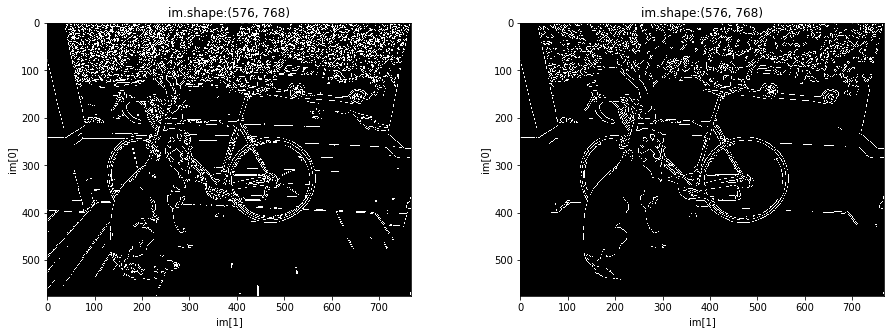

In [11]:
########################################
fig = plt.figure(figsize=(15,7))
nrows, ncols, idx = 1, 2, 0
for _im in plot_array_list:
    idx += 1
    ax = fig.add_subplot(nrows, ncols, idx)
    ax.imshow(_im, cmap="gray")
    ax.set_title(label="im.shape:{}".format(_im.shape))
    ax.set_xlabel(xlabel="im[1]")
    ax.set_ylabel(ylabel="im[0]")
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
print("左がblur前")
plt.show()

### findContours

- [【OpenCV; Python】findcontours関数のまとめ - Qiita](https://qiita.com/anyamaru/items/fd3d894966a98098376c)

In [12]:
# Find contours(輪郭)
contours, hierarchy = cv2.findContours(image=canny_output, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)

In [13]:
print("len(contours)     : {}".format(len(contours)))
print("contours[0].shape : {}".format(contours[0].shape))
print("contours[1].shape : {}".format(contours[1].shape))
print("contours[2].shape : {}".format(contours[2].shape))
print("contours[3].shape : {}".format(contours[3].shape))

len(contours)     : 678
contours[0].shape : (9, 1, 2)
contours[1].shape : (33, 1, 2)
contours[2].shape : (19, 1, 2)
contours[3].shape : (13, 1, 2)


In [14]:
# Approximate contours to polygons + get bounding rects and circles
contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
centers = [None]*len(contours)
radius = [None]*len(contours)
for i, c in enumerate(contours):
    contours_poly[i] = cv2.approxPolyDP(c, 3, True)
    boundRect[i] = cv2.boundingRect(contours_poly[i])
    centers[i], radius[i] = cv2.minEnclosingCircle(contours_poly[i])

In [15]:
drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)

In [16]:
# Draw polygonal contour + bonding rects + circles
for i in range(len(contours)):
    color = (random.randint(0,256), random.randint(0,256), random.randint(0,256))
    cv2.drawContours(drawing, contours_poly, i, color)
    cv2.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
      (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
    #cv2.circle(drawing, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)

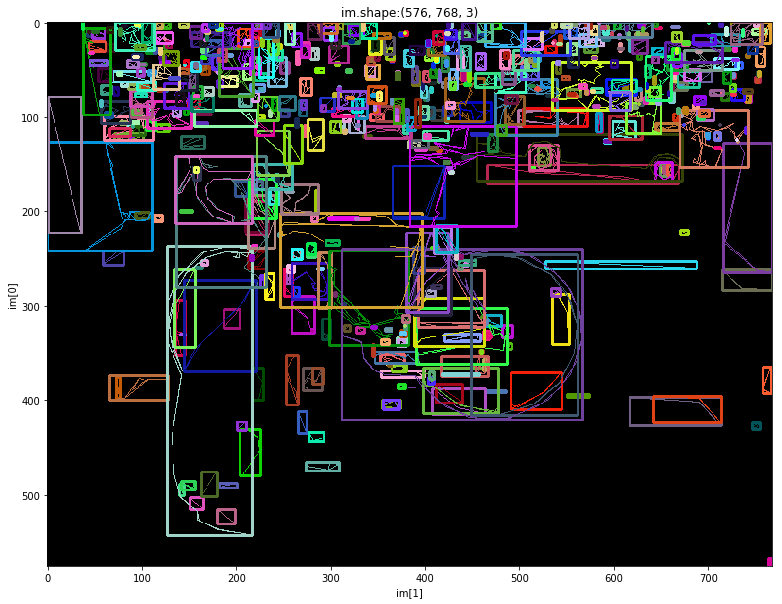

In [17]:
_im = drawing
########################################
fig = plt.figure(figsize=(20,10))
nrows, ncols, idx = 1, 1, 0
idx += 1
ax = fig.add_subplot(nrows, ncols, idx)
ax.imshow(_im, cmap="gray")
ax.set_title(label="im.shape:{}".format(_im.shape))
ax.set_xlabel(xlabel="im[1]")
ax.set_ylabel(ylabel="im[0]")
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

## 2値化

In [ ]:
ret, img_otsu = cv2.threshold(src=img, threshold=0, maxval=255, type=cv2.THRESH_OTSU)

## END